In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx


In [51]:
import pandas as pd

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [52]:
df = pd.read_excel('/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx') # Replace with correct sheet name


In [53]:
# Display first few rows
print(df.head())

# Show summary of dataset
print(df.info())

# Check column names and data types
print(df.dtypes)

      pid  candx_days_x  clinical_m_7thed  clinical_n_7thed  clinical_stag  \
0  100012           454               0.0               0.0          110.0   
1  100049          2428               0.0               0.0          220.0   
2  100055           148             110.0             200.0          400.0   
3  100147           491               0.0               0.0          110.0   
4  100158           795               0.0               0.0          110.0   

   clinical_t_7thed  first_lc  lc_behav  lc_grade  lc_order  ...  age  gender  \
0             110.0         1         3         2         1  ...   61       2   
1             300.0         1         3         3         1  ...   74       2   
2             210.0         1         3         9         1  ...   67       1   
3             120.0         1         3         2         1  ...   68       1   
4             110.0         1         3         3         1  ...   65       1   

   cigsmok  smokework  last_screen_studyyr  

In [ ]:
print(f"Dataset Shape: {df.shape}")  # (Rows, Columns)

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy="median")  # You can use "mean" or "most_frequent"
df[num_cols] = imputer.fit_transform(df[num_cols])

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

In [ ]:
# Summary statistics for numerical columns
print(df.describe())

lung_cancer
1.0    2150
Name: count, dtype: int64


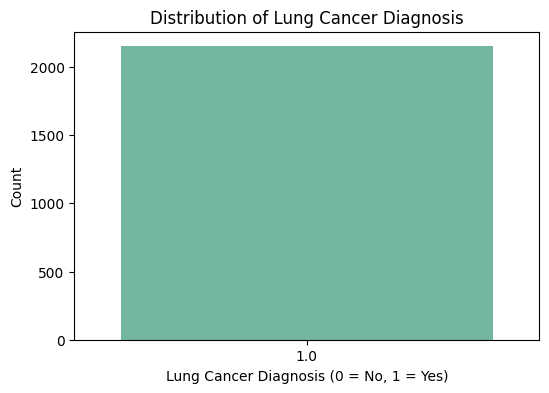

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check distribution of lung cancer status
print(df['lung_cancer'].value_counts())

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['lung_cancer'], palette="Set2")
plt.title("Distribution of Lung Cancer Diagnosis")
plt.xlabel("Lung Cancer Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


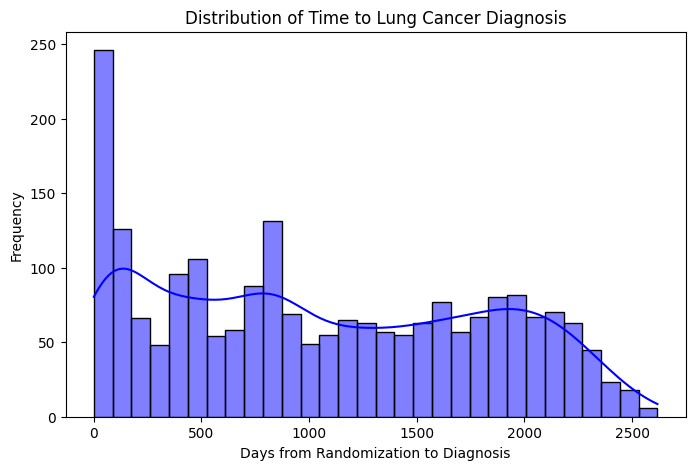

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['candx_days_x'], bins=30, kde=True, color="blue")
plt.title("Distribution of Time to Lung Cancer Diagnosis")
plt.xlabel("Days from Randomization to Diagnosis")
plt.ylabel("Frequency")
plt.show()

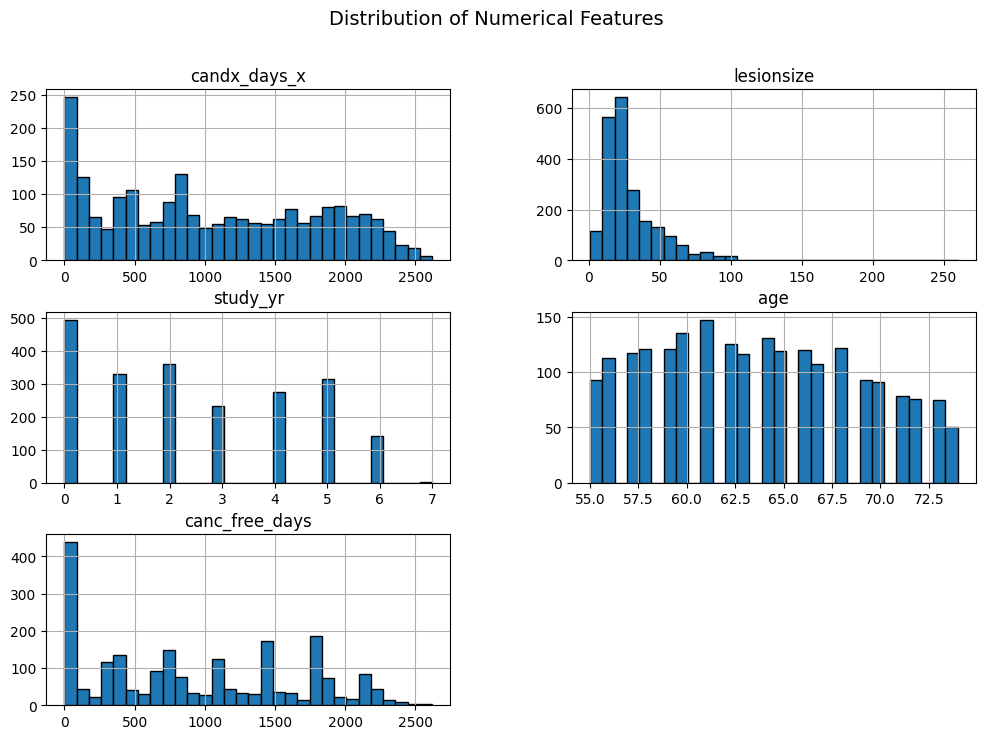

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_cols = ['candx_days_x', 'lesionsize', 'study_yr', 'age', 'canc_free_days']

# Plot histograms
df[num_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

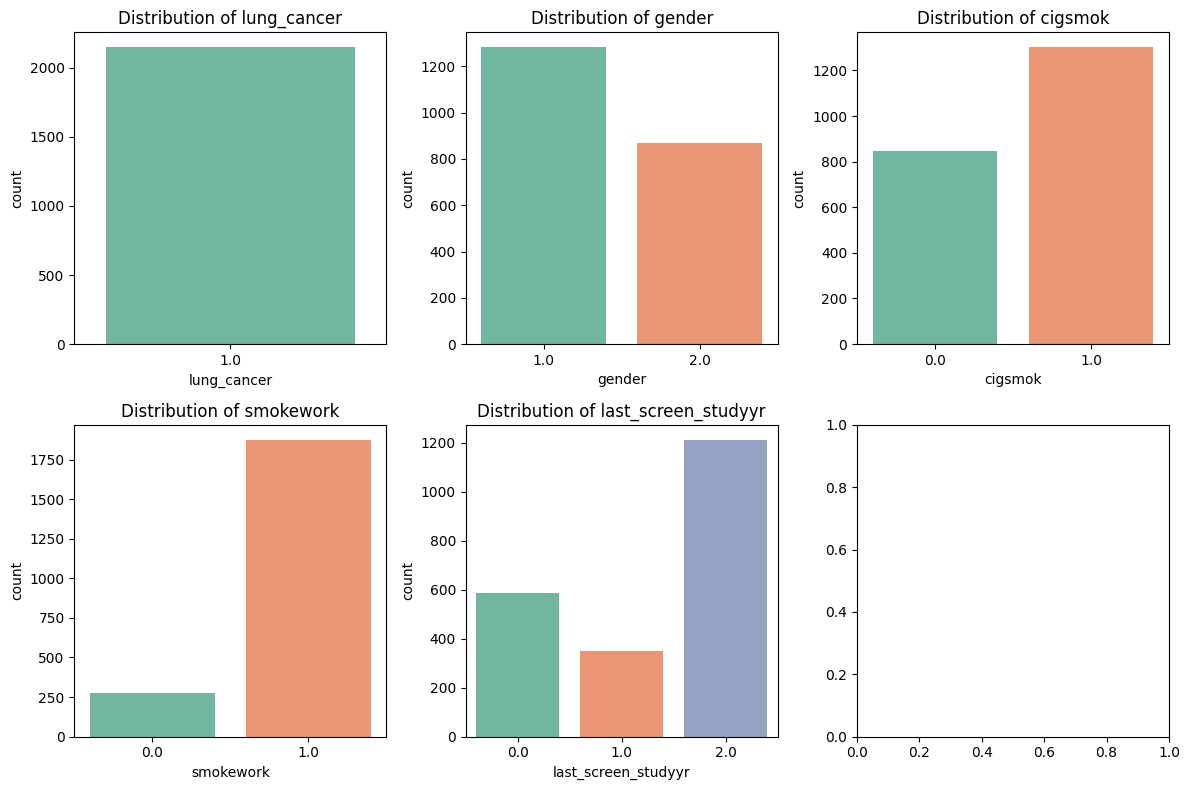

In [13]:
# Select categorical columns
cat_cols = ['lung_cancer', 'gender', 'cigsmok', 'smokework', 'last_screen_studyyr']

# Plot bar charts for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], palette="Set2", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

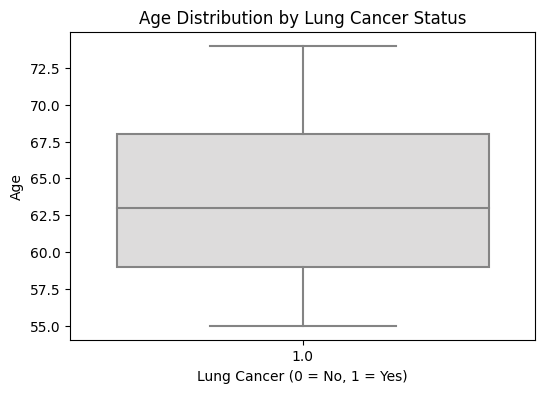

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['lung_cancer'], y=df['age'], palette="coolwarm")
plt.title("Age Distribution by Lung Cancer Status")
plt.xlabel("Lung Cancer (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


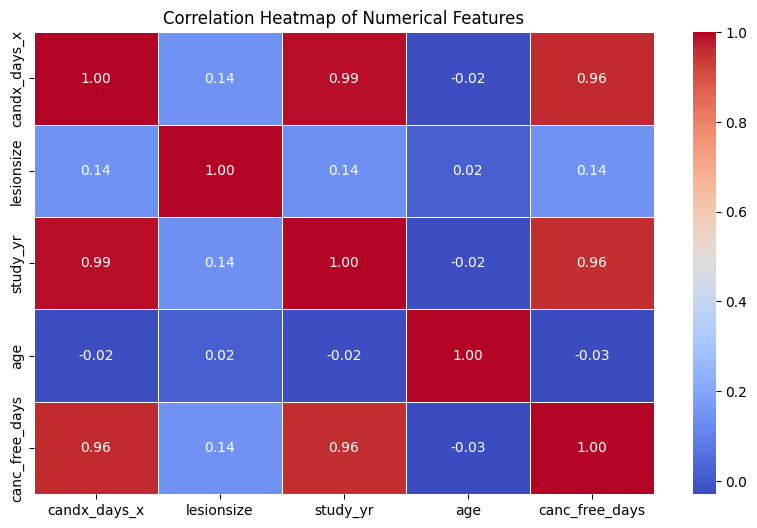

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [16]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=2935c5438b4a0eb92e9b5787716a7e6aaea51852dc55bb47e1ab2738afb3d15b
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


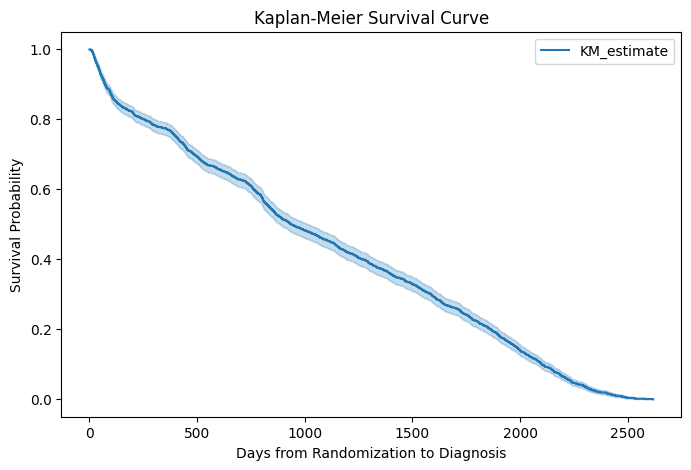

In [17]:
from lifelines import KaplanMeierFitter

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

plt.figure(figsize=(8, 5))
kmf.fit(df['candx_days_x'], event_observed=df['lung_cancer'])
kmf.plot()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Days from Randomization to Diagnosis")
plt.ylabel("Survival Probability")
plt.show()


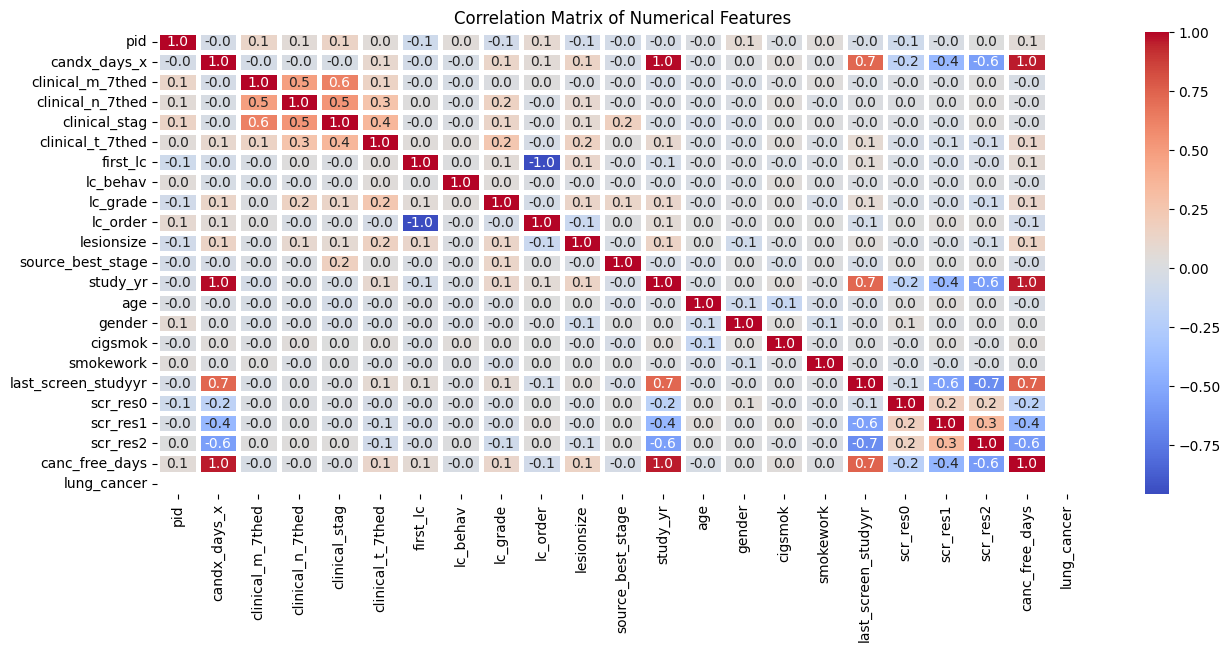

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=3.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [19]:

# Correlation of all numerical features with lung cancer diagnosis
corr_with_lung_cancer = df.corr()['lung_cancer'].sort_values(ascending=False)
print("Correlation with Lung Cancer Diagnosis:\n", corr_with_lung_cancer)


Correlation with Lung Cancer Diagnosis:
 pid                   NaN
candx_days_x          NaN
clinical_m_7thed      NaN
clinical_n_7thed      NaN
clinical_stag         NaN
clinical_t_7thed      NaN
first_lc              NaN
lc_behav              NaN
lc_grade              NaN
lc_order              NaN
lesionsize            NaN
source_best_stage     NaN
study_yr              NaN
age                   NaN
gender                NaN
cigsmok               NaN
smokework             NaN
last_screen_studyyr   NaN
scr_res0              NaN
scr_res1              NaN
scr_res2              NaN
canc_free_days        NaN
lung_cancer           NaN
Name: lung_cancer, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

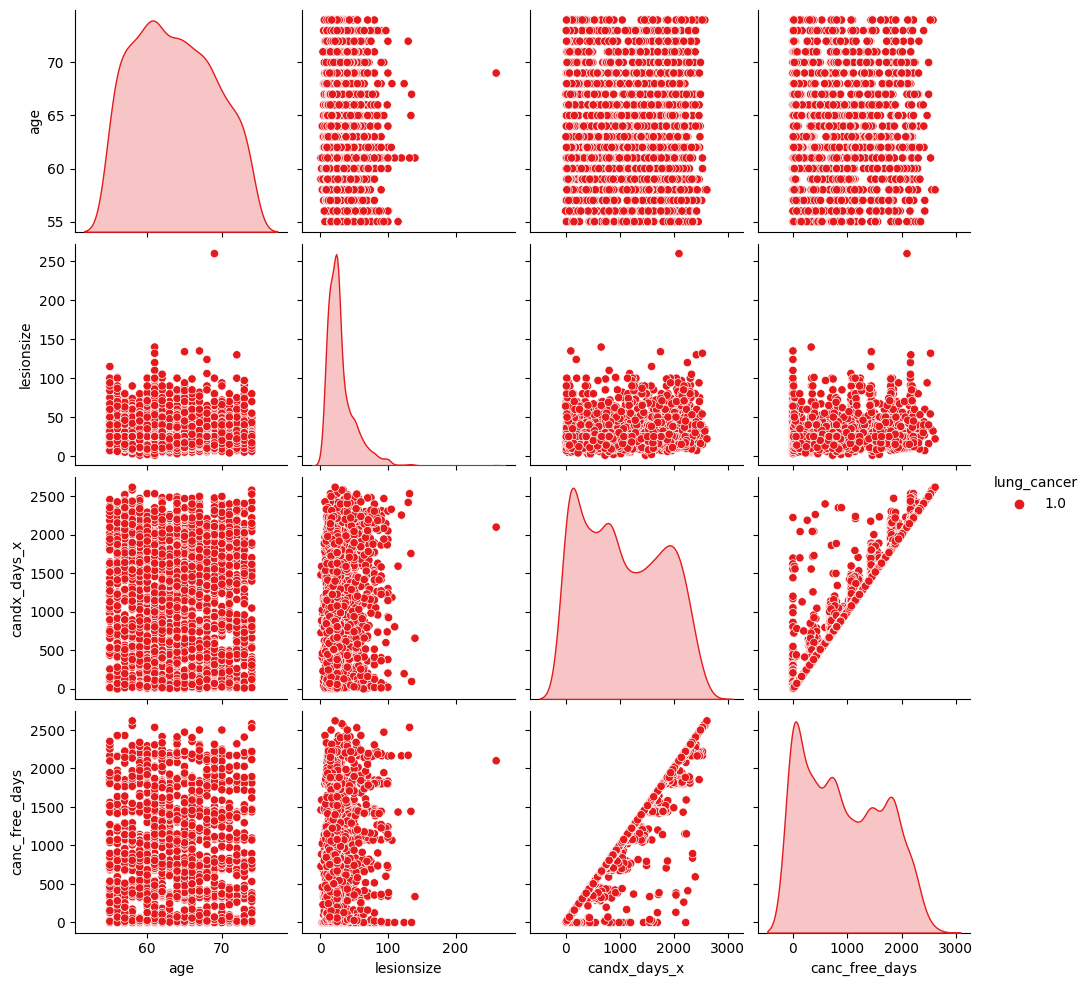

In [20]:
import seaborn as sns

# Select important numerical columns
selected_features = ['age', 'lesionsize', 'candx_days_x', 'canc_free_days', 'lung_cancer']

# Pairplot visualization
sns.pairplot(df[selected_features], hue="lung_cancer", diag_kind="kde", palette="Set1")
plt.show()


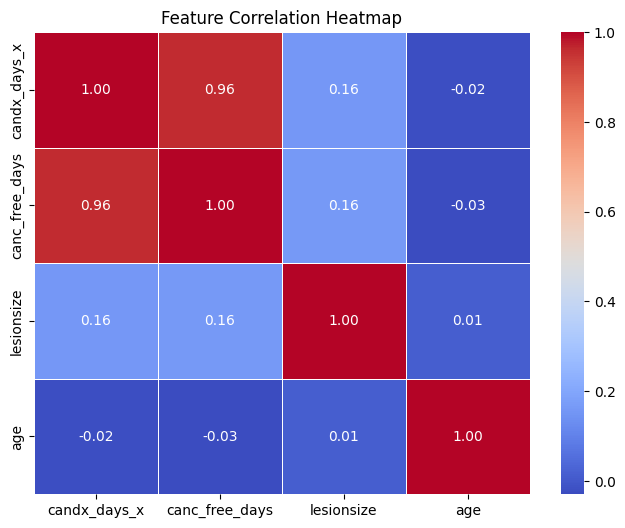

In [21]:


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
file_path = '/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx'  # Update this path if needed
df = pd.read_excel(file_path)

# Selecting relevant features
selected_features = ['candx_days_x', 'canc_free_days', 'lesionsize', 'age']

# Compute correlation matrix
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [22]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter

In [23]:
# Load dataset
df = pd.read_excel('/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx')

# Define required columns (update column names based on previous feature selection)
time_column = "canc_free_days"  # Survival time
event_column = "lung_cancer"  # 1 if event occurred (death/relapse), 0 if censored

# Keep relevant columns
selected_features = ["age", "lesionsize", "candx_days_x"]  # Update based on feature selection
df_cox = df[[time_column, event_column] + selected_features].dropna()

print(df_cox.head())


   canc_free_days  lung_cancer  age  lesionsize  candx_days_x
0             336            1   61        20.0           454
1            2203            1   74        54.0          2428
2               0            1   67        14.0           148
3             395            1   68        28.0           491
4             728            1   65        17.0           795


In [24]:
# Initialize Cox model
cox_model = CoxPHFitter()

# Fit the model
cox_model.fit(df_cox, duration_col=time_column, event_col=event_column)

# Display summary
cox_model.print_summary()


<lifelines.CoxPHFitter: fitted with 1877 total observations, 0 right-censored observations>
             duration col = 'canc_free_days'
                event col = 'lung_cancer'
      baseline estimation = breslow
   number of observations = 1877
number of events observed = 1877
   partial log-likelihood = -9628.73
         time fit was run = 2025-02-20 11:27:08 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
age           0.00      1.00      0.00           -0.00            0.01                1.00                1.01
lesionsize    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
candx_days_x -0.01      0.99      0.00           -0.01           -0.01                0.99                0.99

              cmp to      z      p  -log2(p)
covariate                                   
age             0.00   1.04   0.30      1.75
lesionsize      0.00   1.06   0.29      1.80
candx_days_x    0.00 -43.40 <0.005       inf
---
Concordance = 0.92
Partial AIC = 19263.45
log-likelihood ratio test = 5293.43 on 3 df
-log2(p) of ll-ratio test = inf

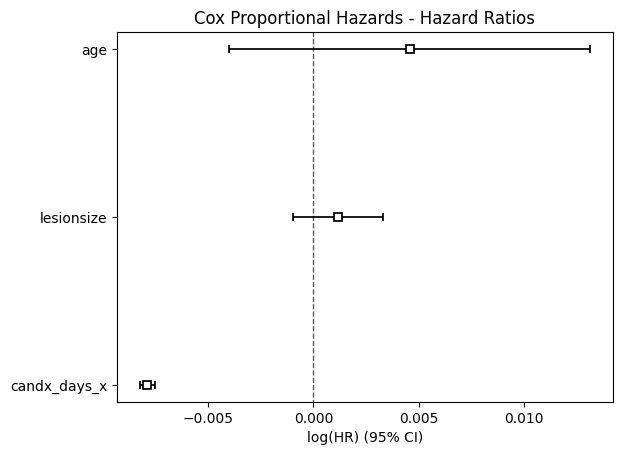

In [25]:
import matplotlib.pyplot as plt

# Plot Hazard Ratios
cox_model.plot()
plt.title("Cox Proportional Hazards - Hazard Ratios")
plt.show()


In [26]:
pip install pandas numpy lifelines scikit-learn torch torchtuples


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
!pip uninstall -y scikit-learn scikit-survival
!pip install scikit-learn==1.2.2 scikit-survival


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 2.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scikit-survival to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 65.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 61.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 10.1 MB/s e

In [33]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtuples as tt  # DeepSurv helper functions
from lifelines import CoxPHFitter
from sksurv.ensemble import RandomSurvivalForest
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

In [34]:
# Load the dataset
df = pd.read_excel("/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx")

# Select features based on previous EDA results
selected_features = ["age", "lesionsize", "candx_days_x"]  # Update based on EDA

# Define target variables
time_column = "canc_free_days"  # Survival time
event_column = "lung_cancer"    # Event (1 = occurred, 0 = censored)

# Drop missing values
df = df[[time_column, event_column] + selected_features].dropna()

# Normalize feature values
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

# Convert event column to boolean format for sksurv
df["lung_cancer"] = df["lung_cancer"].astype(bool)

# Convert dataset to structured array format for survival models
structured_array = np.array([(t, e) for t, e in zip(df[time_column], df[event_column])],
                            dtype=[('time', 'f8'), ('event', 'bool')])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], structured_array, test_size=0.2, random_state=42)


In [35]:
cox = CoxPHFitter()
df_cox = df.copy()
df_cox[event_column] = df_cox[event_column].astype(int)  # Convert boolean back to int
cox.fit(df_cox, duration_col=time_column, event_col=event_column)
cox.print_summary()


<lifelines.CoxPHFitter: fitted with 1877 total observations, 0 right-censored observations>
             duration col = 'canc_free_days'
                event col = 'lung_cancer'
      baseline estimation = breslow
   number of observations = 1877
number of events observed = 1877
   partial log-likelihood = -9628.73
         time fit was run = 2025-02-20 11:27:36 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
age           0.02      1.02      0.02           -0.02            0.07                0.98                1.07
lesionsize    0.03      1.03      0.02           -0.02            0.07                0.98                1.07
candx_days_x -5.92      0.00      0.14           -6.18           -5.65                0.00                0.00

              cmp to      z      p  -log2(p)
covariate                                   
age             0.00   1.04   0.30      1.75
lesionsize      0.00   1.06   0.29      1.80
candx_days_x    0.00 -43.40 <0.005       inf
---
Concordance = 0.92
Partial AIC = 19263.45
log-likelihood ratio test = 5293.43 on 3 df
-log2(p) of ll-ratio test = inf

In [36]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx')
# Check the columns
print(df.columns)

# Assuming 'canc_free_days' is the time-to-event and 'lung_cancer' is the event indicator
# 'lung_cancer' = 1 means the event (lung cancer) occurred, 0 means censored
df['event'] = df['lung_cancer']
df['time'] = df['canc_free_days']

# Drop unnecessary columns
df = df.drop(columns=['lung_cancer', 'canc_free_days'])

# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with median or drop)
df = df.fillna(df.median())

# Convert categorical variables to dummy/indicator variables if necessary
df = pd.get_dummies(df, drop_first=True)

# Split the data into features and target
X = df.drop(columns=['event', 'time'])
y = df[['event', 'time']]

Index(['pid', 'candx_days_x', 'clinical_m_7thed', 'clinical_n_7thed',
       'clinical_stag', 'clinical_t_7thed', 'first_lc', 'lc_behav', 'lc_grade',
       'lc_order', 'lesionsize', 'source_best_stage', 'study_yr', 'age',
       'gender', 'cigsmok', 'smokework', 'last_screen_studyyr', 'scr_res0',
       'scr_res1', 'scr_res2', 'canc_free_days', 'lung_cancer'],
      dtype='object')
pid                      0
candx_days_x             0
clinical_m_7thed        78
clinical_n_7thed        78
clinical_stag           27
clinical_t_7thed       106
first_lc                 0
lc_behav                 0
lc_grade                 0
lc_order                 0
lesionsize             273
source_best_stage        0
study_yr                 0
age                      0
gender                   0
cigsmok                  0
smokework               21
last_screen_studyyr     37
scr_res0                 0
scr_res1                 0
scr_res2                 0
event                    0
time                

In [37]:
!pip install lifelines

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index

# Load dataset
file_path = "/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx"  # Update with your file path
df = pd.read_excel(file_path)

# Define survival columns
time_column = "canc_free_days"  # Time to event
event_column = "lung_cancer"  # Event indicator (1=event occurred, 0=censored)

# Select feature columns (excluding ID and survival columns)
feature_columns = [col for col in df.columns if col not in ["pid", time_column, event_column]]

# Handle missing values (median imputation)
df[feature_columns] = df[feature_columns].fillna(df[feature_columns].median())

# Convert event column to boolean (1=event occurred, 0=censored)
df[event_column] = df[event_column].astype(int)

# Split into train-test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_columns], df[[time_column, event_column]], test_size=0.2, random_state=42
)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_time = torch.tensor(y_train[time_column].values, dtype=torch.float32)
y_train_event = torch.tensor(y_train[event_column].values, dtype=torch.float32)
y_test_time = torch.tensor(y_test[time_column].values, dtype=torch.float32)
y_test_event = torch.tensor(y_test[event_column].values, dtype=torch.float32)

# Define Custom Survival Loss Function (Negative Partial Log-Likelihood)
class CoxLoss(nn.Module):
    def forward(self, risk_scores, times, events):
        """
        Computes the Cox Negative Log-Likelihood loss.
        risk_scores: Predicted risk scores from the model.
        times: Survival times.
        events: Event indicators (1 = event occurred, 0 = censored).
        """
        # Sort data by descending survival time
        sorted_idx = torch.argsort(times, descending=True)
        times, events, risk_scores = times[sorted_idx], events[sorted_idx], risk_scores[sorted_idx]

        # Compute cumulative sum of exponentiated risk scores
        risk_exp = torch.exp(risk_scores)
        risk_cumsum = torch.cumsum(risk_exp, dim=0)

        # Compute log-likelihood for events
        log_likelihood = torch.sum((risk_scores - torch.log(risk_cumsum)) * events)

        # Negative Cox Partial Log-Likelihood
        return -log_likelihood

# Define the Random Survival Forest model
class RandomSurvivalForest(nn.Module):
    def __init__(self, input_dim, n_trees=100):
        super(RandomSurvivalForest, self).__init__()
        self.trees = nn.ModuleList([nn.Linear(input_dim, 1) for _ in range(n_trees)])

    def forward(self, x):
        outputs = torch.stack([tree(x).squeeze() for tree in self.trees], dim=1)
        return torch.mean(outputs, dim=1)  # Averaging tree outputs for risk prediction

# Initialize model
input_dim = X_train.shape[1]
model = RandomSurvivalForest(input_dim, n_trees=100)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
cox_loss = CoxLoss()

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    risk_scores = model(X_train_tensor)
    
    # Compute Cox loss
    loss = cox_loss(risk_scores, y_train_time, y_train_event)
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).numpy()

# Compute Concordance Index (C-index)
c_index = concordance_index(y_test_time.numpy(), -test_predictions, y_test_event.numpy())
print(f"C-Index (Survival Prediction Accuracy): {c_index:.4f}")


Epoch 0: Loss = 11111.361328125
Epoch 50: Loss = 9795.666015625
Epoch 100: Loss = 9338.763671875
Epoch 150: Loss = 9088.0166015625
Epoch 200: Loss = 8924.337890625
Epoch 250: Loss = 8809.9248046875
Epoch 300: Loss = 8727.2177734375
Epoch 350: Loss = 8666.2529296875
Epoch 400: Loss = 8620.763671875
Epoch 450: Loss = 8586.55859375
C-Index (Survival Prediction Accuracy): 0.9210


C-Index (Survival Prediction Accuracy): 0.9235


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

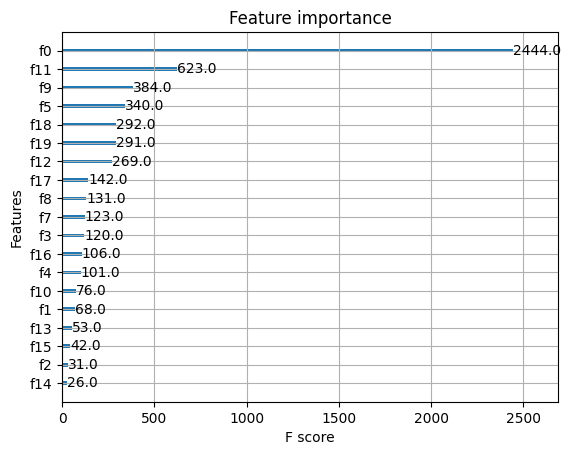

In [45]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index

# Load dataset
file_path = "/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx"  # Update with your file path
df = pd.read_excel(file_path)

# Define survival columns
time_column = "canc_free_days"  # Time to event
event_column = "lung_cancer"  # Event indicator (1=event occurred, 0=censored)

# Select feature columns (excluding ID and survival columns)
feature_columns = [col for col in df.columns if col not in ["pid", time_column, event_column]]

# Handle missing values (median imputation)
df[feature_columns] = df[feature_columns].fillna(df[feature_columns].median())

# Convert event column to binary (1=event occurred, 0=censored)
df[event_column] = df[event_column].astype(int)

# Split into train-test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_columns], df[[time_column, event_column]], test_size=0.2, random_state=42
)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train[time_column], weight=y_train[event_column])
dtest = xgb.DMatrix(X_test, label=y_test[time_column], weight=y_test[event_column])

# XGBoost parameters for survival analysis
params = {
    "objective": "survival:cox",  # Cox proportional hazards model
    "eval_metric": "cox-nloglik",
    "eta": 0.015,  # Learning rate
    "max_depth": 4,  # Depth of trees
    "subsample": 0.8,  # Row sampling
    "colsample_bytree": 0.8,  # Feature sampling
}

# Train XGBoost model
num_round = 500  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Make predictions (hazard scores)
predictions = bst.predict(dtest)

# Compute Concordance Index (C-index)
c_index = concordance_index(y_test[time_column].values, -predictions, y_test[event_column].values)
print(f"C-Index (Survival Prediction Accuracy): {c_index:.4f}")

# Feature Importance
xgb.plot_importance(bst)


### DL Algorithms

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index  # Import for C-Index calculation

# Load dataset
file_path = "/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx"
df = pd.read_excel(file_path)

# Check for NaN and fill with mean
df.fillna(df.mean(), inplace=True)

# Convert categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Extract features and target variables
X = df.drop(columns=['canc_free_days', 'lung_cancer'])  # Features
y_time = df['canc_free_days'].values  # Time to event
y_event = df['lung_cancer'].values  # Event (1 = event occurred, 0 = censored)

# Ensure y_time is positive
y_time = np.abs(y_time)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert survival data into structured NumPy array
y = np.array([(t, e) for t, e in zip(y_time, y_event)], dtype=[('time', 'f8'), ('event', 'i4')])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_time = torch.tensor(y_train['time'].astype(np.float32), dtype=torch.float32).view(-1, 1)
y_train_event = torch.tensor(y_train['event'].astype(np.float32), dtype=torch.float32).view(-1, 1)

# Define Neural Network Model
class SurvivalNN(nn.Module):
    def __init__(self, input_dim):
        super(SurvivalNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Risk Score
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Model Initialization
input_dim = X_train.shape[1]
model = SurvivalNN(input_dim)

# Cox Proportional Hazards Loss Function
def cox_loss(risk, event, eps=1e-9):
    log_risk = torch.logsumexp(risk, dim=0)
    loss = -torch.sum(event * (risk - log_risk))
    return loss

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Lower LR to avoid NaNs

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    
    optimizer.zero_grad()
    risk_scores = model(X_train_tensor)
    
    loss = cox_loss(risk_scores, y_train_event)  # Use Cox Loss
    if torch.isnan(loss):  # Check for NaN
        print("NaN detected in loss, stopping training!")
        break
    
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_risk_scores = model(X_test_tensor).numpy().flatten()

# Compute Concordance Index (C-Index)
c_index = concordance_index(y_test['time'], -test_risk_scores, event_observed=y_test['event'])  # Negative because higher risk = shorter survival
print(f"Concordance Index (C-Index): {c_index:.4f}")

print("Model training completed!")


Epoch [0/500], Loss: 12817.8945
Epoch [10/500], Loss: 12816.7461
Epoch [20/500], Loss: 12815.9980
Epoch [30/500], Loss: 12815.5391
Epoch [40/500], Loss: 12815.2490
Epoch [50/500], Loss: 12815.0518
Epoch [60/500], Loss: 12814.9092
Epoch [70/500], Loss: 12814.7988
Epoch [80/500], Loss: 12814.7129
Epoch [90/500], Loss: 12814.6445
Epoch [100/500], Loss: 12814.5898
Epoch [110/500], Loss: 12814.5449
Epoch [120/500], Loss: 12814.5078
Epoch [130/500], Loss: 12814.4736
Epoch [140/500], Loss: 12814.4473
Epoch [150/500], Loss: 12814.4238
Epoch [160/500], Loss: 12814.4023
Epoch [170/500], Loss: 12814.3867
Epoch [180/500], Loss: 12814.3711
Epoch [190/500], Loss: 12814.3564
Epoch [200/500], Loss: 12814.3428
Epoch [210/500], Loss: 12814.3320
Epoch [220/500], Loss: 12814.3213
Epoch [230/500], Loss: 12814.3115
Epoch [240/500], Loss: 12814.3027
Epoch [250/500], Loss: 12814.2949
Epoch [260/500], Loss: 12814.2871
Epoch [270/500], Loss: 12814.2812
Epoch [280/500], Loss: 12814.2734
Epoch [290/500], Loss: 12

### Improved Deep-Surv

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from lifelines.utils import concordance_index

# Load dataset
file_path = "/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx"
df = pd.read_excel(file_path)

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# Convert categorical variables
df = pd.get_dummies(df, drop_first=True)

# Extract features and target variables
X = df.drop(columns=['canc_free_days', 'lung_cancer'])  # Features
y_time = df['canc_free_days'].values  # Time to event
y_event = df['lung_cancer'].values  # Event (1 = event occurred, 0 = censored)

# Ensure y_time is positive
y_time = np.maximum(y_time, 1e-3)  # Prevent zero values

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Convert survival data into structured NumPy array
y = np.array([(t, e) for t, e in zip(y_time, y_event)], dtype=[('time', 'f8'), ('event', 'i4')])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_time = torch.tensor(y_train['time'], dtype=torch.float32).view(-1, 1)
y_train_event = torch.tensor(y_train['event'], dtype=torch.float32).view(-1, 1)

# Define Improved DeepSurv Model
class DeepSurv(nn.Module):
    def __init__(self, input_dim):
        super(DeepSurv, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)  # Risk Score
        self.leaky_relu = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.leaky_relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = DeepSurv(input_dim)

# Cox Proportional Hazards Loss Function with Stabilization
def cox_loss(risk, event, eps=1e-9):
    risk_sorted, idx = torch.sort(risk, descending=True)
    event_sorted = event[idx]

    log_cumsum_risk = torch.log(torch.cumsum(torch.exp(risk_sorted), dim=0) + eps)
    loss = -torch.sum(event_sorted * (risk_sorted - log_cumsum_risk))
    return loss

# Optimizer and Scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.9)

# Training loop with mini-batches
batch_size = 64
epochs = 500

for epoch in range(epochs):
    model.train()
    
    indices = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train_tensor[indices]
    y_train_event_shuffled = y_train_event[indices]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch_event = y_train_event_shuffled[i:i+batch_size]

        optimizer.zero_grad()
        risk_scores = model(X_batch)
        loss = cox_loss(risk_scores, y_batch_event)
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)  # Gradient Clipping
        optimizer.step()
    
    scheduler.step()
    
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_risk_scores = model(X_test_tensor).numpy().flatten()

# Compute Concordance Index (C-Index)
c_index = concordance_index(y_test['time'], -test_risk_scores, event_observed=y_test['event'])
print(f"Concordance Index (C-Index): {c_index:.4f}")

print("Model training completed!")


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index

# Load dataset
file_path = "/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx"
df = pd.read_excel(file_path)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Convert categorical variables
df = pd.get_dummies(df, drop_first=True)


# Extract features and target variables
X = df.drop(columns=['canc_free_days', 'lung_cancer'])  # Features
y_time = df['canc_free_days'].values  # Time to event
y_event = df['lung_cancer'].values  # Event (1 = event occurred, 0 = censored)

# Ensure time is positive
y_time = np.abs(y_time)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert survival data into structured NumPy array
y = np.array([(t, e) for t, e in zip(y_time, y_event)], dtype=[('time', 'f8'), ('event', 'i4')])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_time = torch.tensor(y_train['time'].astype(np.float32), dtype=torch.float32).view(-1, 1)
y_train_event = torch.tensor(y_train['event'].astype(np.float32), dtype=torch.float32).view(-1, 1)

# Define Transformer-Based Survival Model
class TransformerSurvival(nn.Module):
    def __init__(self, input_dim, d_model=128, num_heads=4, num_layers=2, dropout=0.3):
        super(TransformerSurvival, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.transformer_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(self.transformer_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)  # Output risk score

    def forward(self, x):
        x = self.embedding(x)  # Feature embedding
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.transformer(x)
        x = x.squeeze(1)  # Remove sequence dimension
        x = self.fc(x)  # Compute risk score
        return x

# Model Initialization
input_dim = X_train.shape[1]
model = TransformerSurvival(input_dim)

# Cox Proportional Hazards Loss Function
def cox_loss(risk, event, eps=1e-9):
    log_risk = torch.logsumexp(risk, dim=0)
    loss = -torch.sum(event * (risk - log_risk))
    return loss

# Optimizer & Scheduler
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.9)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    
    optimizer.zero_grad()
    risk_scores = model(X_train_tensor)
    
    loss = cox_loss(risk_scores, y_train_event)
    if torch.isnan(loss):
        print("NaN detected in loss, stopping training!")
        break
    
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_risk_scores = model(X_test_tensor).numpy().flatten()

# Compute Concordance Index (C-Index)
c_index = concordance_index(y_test['time'], -test_risk_scores, event_observed=y_test['event'])
print(f"Concordance Index (C-Index): {c_index:.4f}")

print("Model training completed!")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [0/500], Loss: 13001.6816
Epoch [10/500], Loss: 12845.6924
Epoch [20/500], Loss: 12833.6973
Epoch [30/500], Loss: 12828.6006
Epoch [40/500], Loss: 12824.9629
Epoch [50/500], Loss: 12822.7656
Epoch [60/500], Loss: 12821.8916
Epoch [70/500], Loss: 12821.0977
Epoch [80/500], Loss: 12819.8750
Epoch [90/500], Loss: 12818.8184
Epoch [100/500], Loss: 12818.4863
Epoch [110/500], Loss: 12818.2559
Epoch [120/500], Loss: 12817.5742
Epoch [130/500], Loss: 12817.2812
Epoch [140/500], Loss: 12816.9736
Epoch [220/500], Loss: 12815.7852
Epoch [230/500], Loss: 12815.7598
Epoch [240/500], Loss: 12815.6094
Epoch [250/500], Loss: 12815.5020
Epoch [260/500], Loss: 12815.4160
Epoch [270/500], Loss: 12815.4004
Epoch [280/500], Loss: 12815.3184
Epoch [290/500], Loss: 12815.2578
Epoch [300/500], Loss: 12815.2539
Epoch [310/500], Loss: 12815.2422
Epoch [320/500], Loss: 12815.2197
Epoch [330/500], Loss: 12815.2256
Epoch [340/500], Loss: 12815.1113
Epoch [350/500], Loss: 12815.1289
Epoch [360/500], Loss: 12

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index

# Load dataset
file_path = "/kaggle/input/final-lung-cancer-cdsa/Final_LungCancer Dataset.xlsx"
df = pd.read_excel(file_path)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Convert categorical variables
df = pd.get_dummies(df, drop_first=True)

# Extract features and target variables
X = df.drop(columns=['canc_free_days', 'lung_cancer'])
y_time = df['canc_free_days'].values
y_event = df['lung_cancer'].values

# Ensure time is positive
y_time = np.abs(y_time)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert survival data into structured NumPy array
y = np.array([(t, e) for t, e in zip(y_time, y_event)], dtype=[('time', 'f8'), ('event', 'i4')])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_time = torch.tensor(y_train['time'].astype(np.float32), dtype=torch.float32).view(-1, 1)
y_train_event = torch.tensor(y_train['event'].astype(np.float32), dtype=torch.float32).view(-1, 1)

# Define DeepHit Model
class DeepHit(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_bins=50):
        super(DeepHit, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, num_bins)  # Output is probability over time bins
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)  # Output probability distribution over survival times
        return x

# Model Initialization
input_dim = X_train.shape[1]
num_bins = 50  # Discretize time into 50 bins
model = DeepHit(input_dim, num_bins=num_bins)

# Loss Function
def deep_hit_loss(predicted_probs, times, events, num_bins):
    time_bins = torch.linspace(times.min(), times.max(), num_bins)  # Create time bins
    time_indices = torch.bucketize(times, time_bins) - 1  # Assign times to bins
    loss = -torch.sum(events * torch.log(predicted_probs[torch.arange(len(predicted_probs)), time_indices] + 1e-9))
    return loss

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predicted_probs = model(X_train_tensor)
    loss = deep_hit_loss(predicted_probs, y_train_time.flatten(), y_train_event.flatten(), num_bins)
    
    if torch.isnan(loss):
        print("NaN detected in loss, stopping training!")
        break
    
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_probs = model(X_test_tensor).numpy()

# Compute Concordance Index (C-Index)
predicted_risks = -np.sum(test_probs * np.linspace(y_test['time'].min(), y_test['time'].max(), num_bins), axis=1)
c_index = concordance_index(y_test['time'], predicted_risks, event_observed=y_test['event'])
print(f"Concordance Index (C-Index): {c_index:.4f}")

print("Model training completed!")


Epoch [0/500], Loss: 6742.2598
Epoch [10/500], Loss: 6203.2314
Epoch [20/500], Loss: 5487.2529
Epoch [30/500], Loss: 4921.3833
Epoch [40/500], Loss: 4445.1377
Epoch [50/500], Loss: 4054.9849
Epoch [60/500], Loss: 3701.6721
Epoch [70/500], Loss: 3399.7666
Epoch [80/500], Loss: 3153.2429
Epoch [90/500], Loss: 2947.7607
Epoch [100/500], Loss: 2772.9045
Epoch [110/500], Loss: 2620.4719
Epoch [120/500], Loss: 2484.2300
Epoch [130/500], Loss: 2359.7568
Epoch [140/500], Loss: 2244.1277
Epoch [150/500], Loss: 2135.4663
Epoch [160/500], Loss: 2032.1874
Epoch [170/500], Loss: 1933.3370
Epoch [180/500], Loss: 1838.6378
Epoch [190/500], Loss: 1747.1375
Epoch [200/500], Loss: 1658.0732
Epoch [210/500], Loss: 1571.3431
Epoch [220/500], Loss: 1487.5928
Epoch [230/500], Loss: 1406.2704
Epoch [240/500], Loss: 1327.5355
Epoch [250/500], Loss: 1251.6384
Epoch [260/500], Loss: 1178.4404
Epoch [270/500], Loss: 1108.2180
Epoch [280/500], Loss: 1041.0977
Epoch [290/500], Loss: 976.9202
Epoch [300/500], Loss: